Partie 1 : Extraction et nettoyage des données

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [39]:
df = pd. read_csv('logs_final.csv')

In [40]:
df

,serial_number,utc_date,thread,message,insert_date
0,1,2023-08-23T10:55:44.251Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
1,1,2023-08-23T10:58:14.312Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
2,1,2023-08-23T11:00:04.331Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
3,1,2023-08-23T11:02:44.450Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
4,1,2023-08-23T11:10:04.630Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
...,...,...,...,...,...
35543,1,2023-08-31T13:36:37.920Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35544,1,2023-08-31T13:39:39.587Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35545,1,2023-08-31T13:42:00.690Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35546,1,2023-08-31T13:49:14.202Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01


In [41]:
distinct_values = df['serial_number'].unique()
print(distinct_values)

[1 3 2]


In [42]:
df = df[df['serial_number'] != 3]
df

,serial_number,utc_date,thread,message,insert_date
0,1,2023-08-23T10:55:44.251Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
1,1,2023-08-23T10:58:14.312Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
2,1,2023-08-23T11:00:04.331Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
3,1,2023-08-23T11:02:44.450Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
4,1,2023-08-23T11:10:04.630Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Message='GetInstrumentDefectsCountRequest',2023-08-31
...,...,...,...,...,...
35543,1,2023-08-31T13:36:37.920Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35544,1,2023-08-31T13:39:39.587Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35545,1,2023-08-31T13:42:00.690Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01
35546,1,2023-08-31T13:49:14.202Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,Sending instrument status light indicator requ...,2023-09-01


In [43]:
values = df['serial_number'].unique()
print(values)

[1 2]


In [44]:
distinct_values = df['thread'].unique()
print(distinct_values)

['[49CCB9BE12509D5A0300B099F303667565E713C076CADB25594B97B530E42200]'
 '[F8D4A966E619DB8ABAAEB3D94FEEAE64598D4FC06EB752D451EB3E9BF4B137B5]']


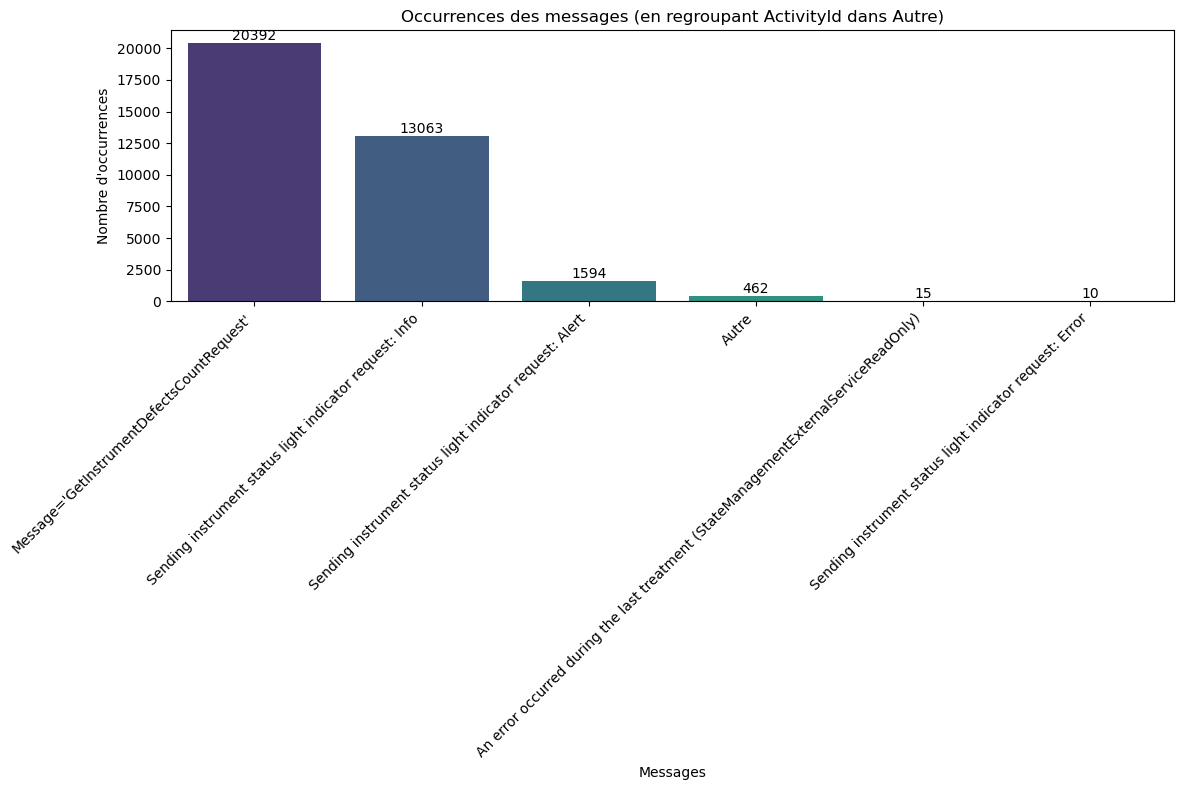

In [45]:
# Fonction pour regrouper les valeurs de la colonne 'message'
def regrouper_messages(message):
    if message.startswith('ActivityId'):
        return 'Autre'
    else:
        return message

# Appliquer la fonction à la colonne 'message' pour obtenir une série résultante
message_group_series = df['message'].apply(regrouper_messages)

# Compter le nombre d'occurrences de chaque valeur dans la série résultante
comptage_occurrences = message_group_series.value_counts()

# Tracer l'histogramme avec Seaborn
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=comptage_occurrences.index, y=comptage_occurrences.values, palette='viridis')
plt.xlabel('Messages')
plt.ylabel("Nombre d'occurrences")
plt.title('Occurrences des messages (en regroupant ActivityId dans Autre)')
plt.xticks(rotation=45, ha='right')

# Ajouter le texte avec les occurrences sur les barres
for index, value in enumerate(comptage_occurrences.values):
    barplot.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [46]:
df = df[df['message'] != "Message='GetInstrumentDefectsCountRequest'"]
df = df[df['message'] != 'An error occurred during the last treatment (StateManagementExternalServiceReadOnly)']
df = df[df['message'] != 'Sending instrument status light indicator request: Alert']
df = df[df['message'] != 'Sending instrument status light indicator request: Info']
df = df[df['message'] != 'Sending instrument status light indicator request: Error']

print(df)

       serial_number                  utc_date  \
631                1  2023-08-31T06:48:44.738Z   
1012               1  2023-08-31T06:48:44.738Z   
1013               1  2023-08-31T07:26:19.903Z   
1014               1  2023-08-24T06:03:55.787Z   
1015               1  2023-08-30T12:20:42.018Z   
...              ...                       ...   
32587              1  2023-08-22T06:49:20.583Z   
33510              1  2023-08-21T08:36:18.487Z   
34120              1  2023-08-21T06:50:54.757Z   
34136              1  2023-08-21T09:05:21.162Z   
34564              1  2023-08-31T11:48:07.490Z   

                                                  thread  \
631    [49CCB9BE12509D5A0300B099F303667565E713C076CAD...   
1012   [49CCB9BE12509D5A0300B099F303667565E713C076CAD...   
1013   [49CCB9BE12509D5A0300B099F303667565E713C076CAD...   
1014   [49CCB9BE12509D5A0300B099F303667565E713C076CAD...   
1015   [49CCB9BE12509D5A0300B099F303667565E713C076CAD...   
...                                    

In [47]:
df[['Measured_x', 'Measured_y', 'Measured_z']] = df['message'].str.extract(r'Measured pad position: \(x=([-?\d.]+);y=([-?\d.]+);z=([-?\d.]+)\)')
df[['Registered_x', 'Registered_y', 'Registered_z']] = df['message'].str.extract(r'Registered pad position: \(x=([-?\d.]+);y=([-?\d.]+);z=([-?\d.]+)\)')
df[['Drift_x', 'Drift_y', 'Drift_z']] = df['message'].str.extract(r'Drift: \(x=([-?\d.]+);y=([-?\d.]+);z=([-?\d.]+)\)')

# Supprimez les colonnes inutiles
df = df.drop(columns=['message'])

# Convertissez les coordonnées en millimètres en nombres flottants
columns_to_convert = ['Measured_x', 'Measured_y', 'Measured_z', 'Registered_x', 'Registered_y', 'Registered_z', 'Drift_x', 'Drift_y', 'Drift_z']
df[columns_to_convert] = df[columns_to_convert].astype(float)

In [48]:
df

,serial_number,utc_date,thread,insert_date,Measured_x,Measured_y,Measured_z,Registered_x,Registered_y,Registered_z,Drift_x,Drift_y,Drift_z
631,1,2023-08-31T06:48:44.738Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-31,167.349380,13.812500,5.934679,168.01,14.36,6.05,-0.660620,-0.547500,-0.115321
1012,1,2023-08-31T06:48:44.738Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-31,167.349380,13.812500,5.934679,168.01,14.36,6.05,-0.660620,-0.547500,-0.115321
1013,1,2023-08-31T07:26:19.903Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-31,167.366257,13.787500,5.927316,168.01,14.36,6.05,-0.643743,-0.572500,-0.122684
1014,1,2023-08-24T06:03:55.787Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-31,167.923126,14.475000,6.023036,168.01,14.36,6.05,-0.086874,0.115000,-0.026964
1015,1,2023-08-30T12:20:42.018Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-31,167.433762,13.637500,5.956769,168.01,14.36,6.05,-0.576238,-0.722500,-0.093231
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32587,1,2023-08-22T06:49:20.583Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-23,167.906250,14.450000,6.008310,168.01,14.36,6.05,-0.103750,0.090000,-0.041690
33510,1,2023-08-21T08:36:18.487Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-21,167.940002,14.475000,6.015673,168.01,14.36,6.05,-0.069998,0.115000,-0.034327
34120,1,2023-08-21T06:50:54.757Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-21,167.872513,14.462501,6.008310,168.01,14.36,6.05,-0.137487,0.102501,-0.041690
34136,1,2023-08-21T09:05:21.162Z,[49CCB9BE12509D5A0300B099F303667565E713C076CAD...,2023-08-21,167.940002,14.437500,6.015673,168.01,14.36,6.05,-0.069998,0.077500,-0.034327


In [49]:
types_de_colonnes = df.dtypes
print(types_de_colonnes)


serial_number      int64
utc_date          object
thread            object
insert_date       object
Measured_x       float64
Measured_y       float64
Measured_z       float64
Registered_x     float64
Registered_y     float64
Registered_z     float64
Drift_x          float64
Drift_y          float64
Drift_z          float64
dtype: object


In [50]:
nan_check = df.isna().any()

# Vérifier si au moins une colonne contient des valeurs NaN
if nan_check.any():
    print("Le DataFrame contient des valeurs NaN.")
    print("Colonnes avec des valeurs NaN :")
    print(nan_check[nan_check])
else:
    print("Le DataFrame ne contient pas de valeurs NaN.")

Le DataFrame ne contient pas de valeurs NaN.


Partie 2 : Visualisation et analyse des données

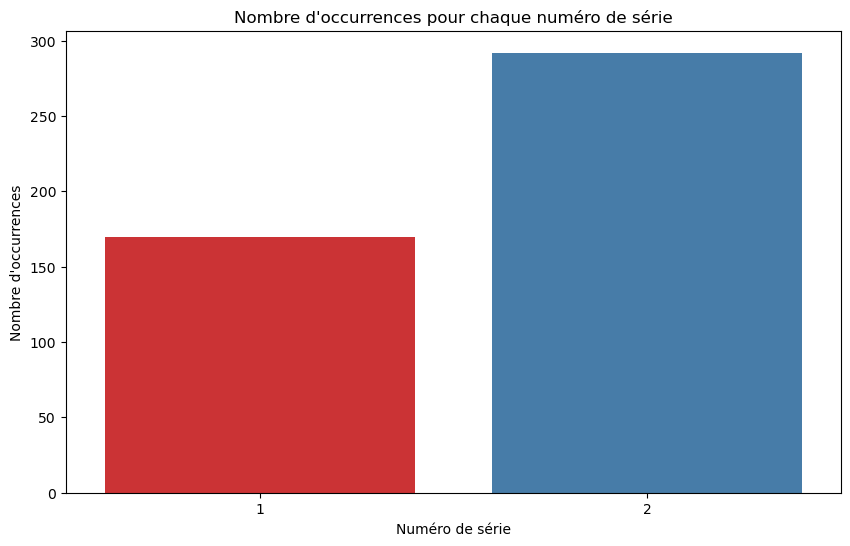

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(x='serial_number', data=df, palette='Set1')
plt.title('Nombre d\'occurrences pour chaque numéro de série')
plt.xlabel('Numéro de série')
plt.ylabel('Nombre d\'occurrences')
plt.show()


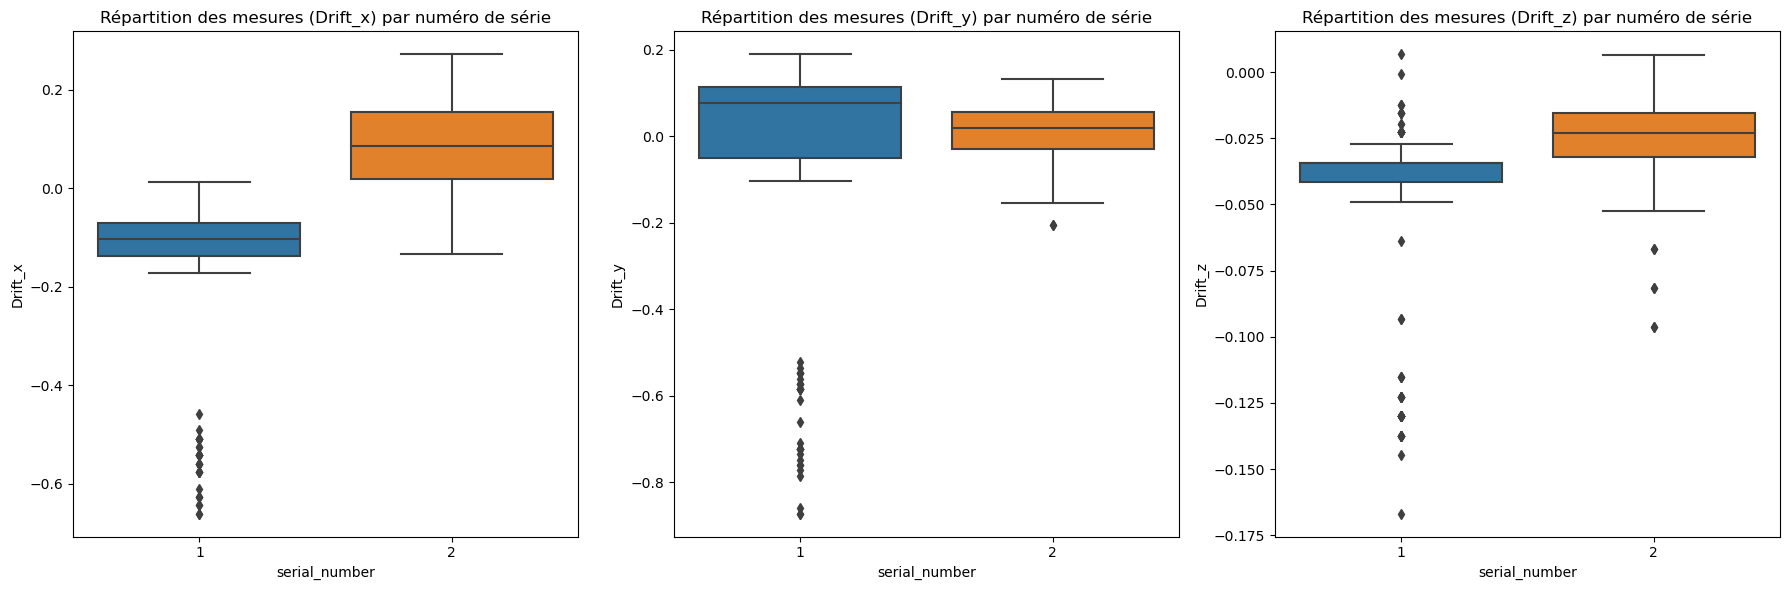

In [52]:
# Créer une grille de subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Boxplot pour Drift_x
sns.boxplot(x='serial_number', y='Drift_x', data=df, ax=axes[0])
axes[0].set_title('Répartition des mesures (Drift_x) par numéro de série')

# Boxplot pour Drift_y
sns.boxplot(x='serial_number', y='Drift_y', data=df, ax=axes[1])
axes[1].set_title('Répartition des mesures (Drift_y) par numéro de série')

# Boxplot pour Drift_z
sns.boxplot(x='serial_number', y='Drift_z', data=df, ax=axes[2])
axes[2].set_title('Répartition des mesures (Drift_z) par numéro de série')

# Ajuster l'espace entre les subplots
plt.tight_layout()

# Afficher les boxplots
plt.show()



In [53]:
# Sélectionner les colonnes 'Measured_x', 'Measured_y' et 'Measured_z'
colonnes_mesurees = df[['Measured_x', 'Measured_y', 'Measured_z','Registered_x','Registered_y','Registered_z']]

# Calculer la moyenne et l'écart type
moyenne_mesurees = colonnes_mesurees.mean()
ecart_type_mesurees = colonnes_mesurees.std()

# Afficher les résultats
print("Moyenne des valeurs de Measured_x, Measured_y, Measured_z, Registered_x, Registered_y, Registered_z :")
print(moyenne_mesurees)
print("\nÉcart type des valeurs de Measured_x, Measured_y et Measured_z, Registered_x, Registered_y, Registered_z :")
print(ecart_type_mesurees)


Moyenne des valeurs de Measured_x, Measured_y, Measured_z, Registered_x, Registered_y, Registered_z :
Measured_x      361.875916
Measured_y       15.246862
Measured_z        6.545149
Registered_x    361.891602
Registered_y     15.266494
Registered_z      6.580736
dtype: float64

Écart type des valeurs de Measured_x, Measured_y et Measured_z, Registered_x, Registered_y, Registered_z :
Measured_x      148.273254
Measured_y        0.885704
Measured_z        0.432867
Registered_x    148.150218
Registered_y      0.826967
Registered_z      0.419517
dtype: float64


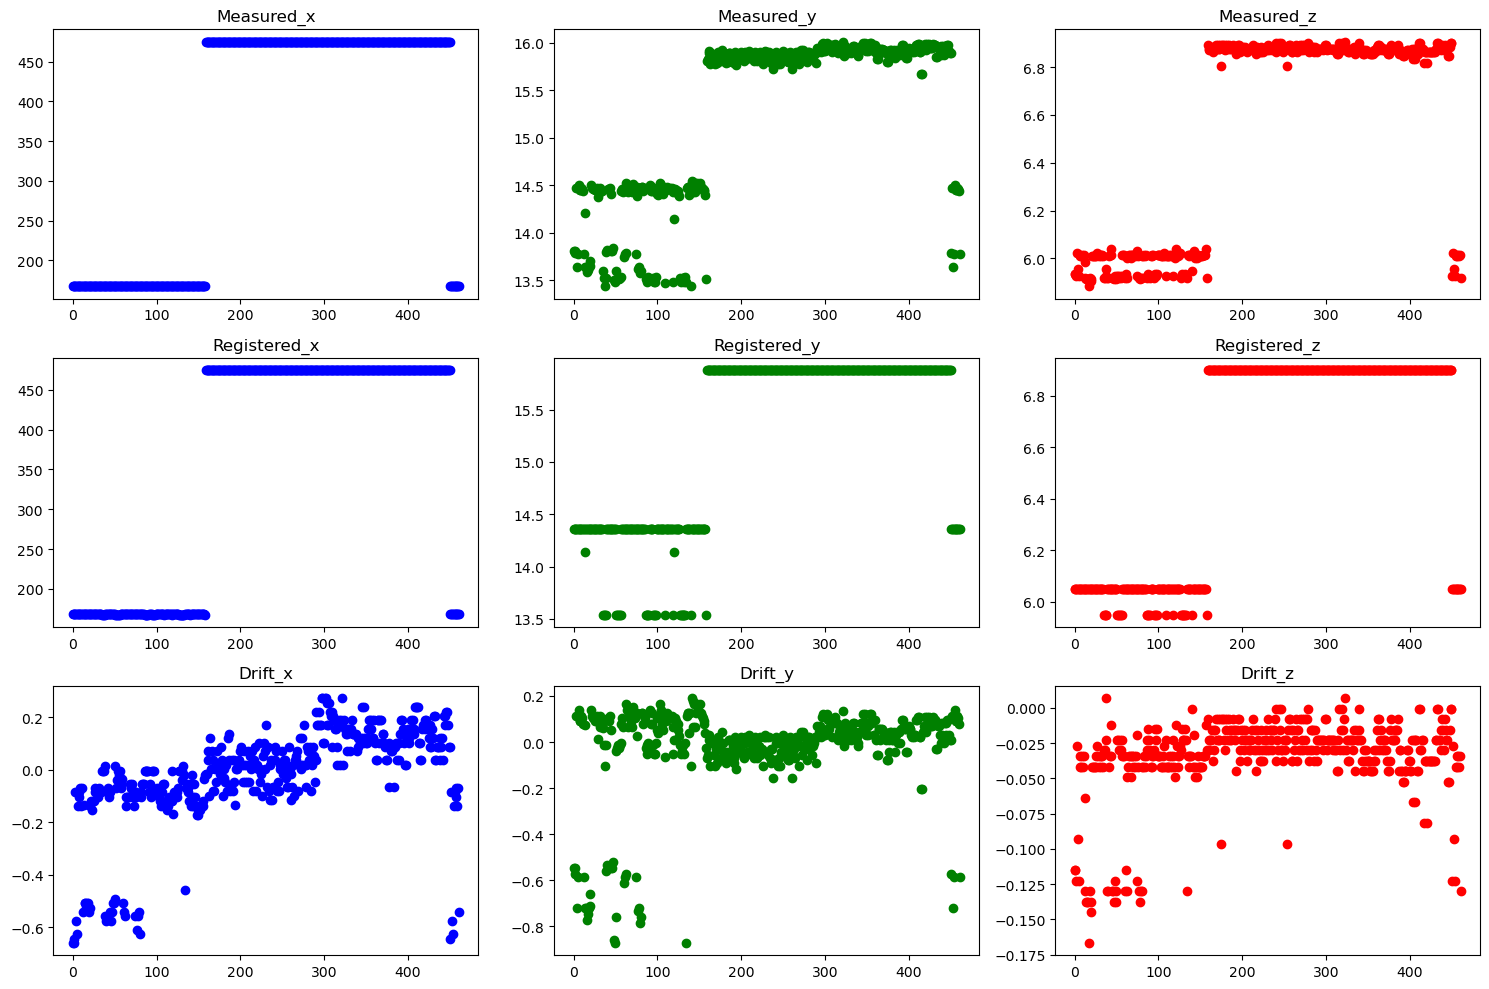

In [54]:
# Sélectionner les colonnes 'Measured_x', 'Measured_y', 'Measured_z', 'Registered_x', 'Registered_y', 'Registered_z', 'Drift_x', 'Drift_y', 'Drift_z'
colonnes_mesurees = df[['Measured_x', 'Measured_y', 'Measured_z', 'Registered_x', 'Registered_y', 'Registered_z', 'Drift_x', 'Drift_y', 'Drift_z']]

# Tracer un nuage de points pour chaque colonne
plt.figure(figsize=(15, 10))  # Ajuster la taille de la figure

# Nuage de points pour Measured_x
plt.subplot(3, 3, 1)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Measured_x'], color='blue')
plt.title('Measured_x')

# Nuage de points pour Measured_y
plt.subplot(3, 3, 2)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Measured_y'], color='green')
plt.title('Measured_y')

# Nuage de points pour Measured_z
plt.subplot(3, 3, 3)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Measured_z'], color='red')
plt.title('Measured_z')

# Nuage de points pour Registered_x
plt.subplot(3, 3, 4)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Registered_x'], color='blue')
plt.title('Registered_x')

# Nuage de points pour Registered_y
plt.subplot(3, 3, 5)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Registered_y'], color='green')
plt.title('Registered_y')

# Nuage de points pour Registered_z
plt.subplot(3, 3, 6)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Registered_z'], color='red')
plt.title('Registered_z')

# Nuage de points pour Drift_x
plt.subplot(3, 3, 7)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Drift_x'], color='blue')
plt.title('Drift_x')

# Nuage de points pour Drift_y
plt.subplot(3, 3, 8)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Drift_y'], color='green')
plt.title('Drift_y')

# Nuage de points pour Drift_z
plt.subplot(3, 3, 9)
plt.scatter(range(len(colonnes_mesurees)), colonnes_mesurees['Drift_z'], color='red')
plt.title('Drift_z')

plt.tight_layout()
plt.show()


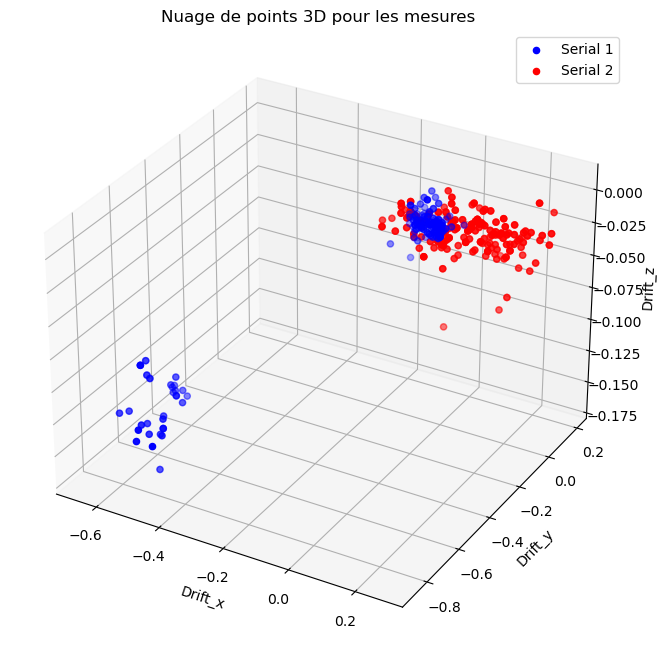

In [55]:
# Créer une figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Créer un dictionnaire de couleurs en fonction du numéro de série
colors = {1: 'blue', 2: 'red'}

# Tracer le nuage de points 3D
for serial_number, color in colors.items():
    serial_df = df[df['serial_number'] == serial_number]
    ax.scatter(serial_df['Drift_x'], serial_df['Drift_y'], serial_df['Drift_z'], c=color, marker='o', label=f'Serial {serial_number}')

# Ajouter des labels aux axes
ax.set_xlabel('Drift_x')
ax.set_ylabel('Drift_y')
ax.set_zlabel('Drift_z')

# Ajouter une légende
ax.legend()

# Afficher le diagramme
plt.title('Nuage de points 3D pour les mesures')
plt.show()


C:\Users\amese\AppData\Local\Temp\ipykernel_125976\789807301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie_choisi['utc_date'] = pd.to_datetime(df_serie_choisi['utc_date'])


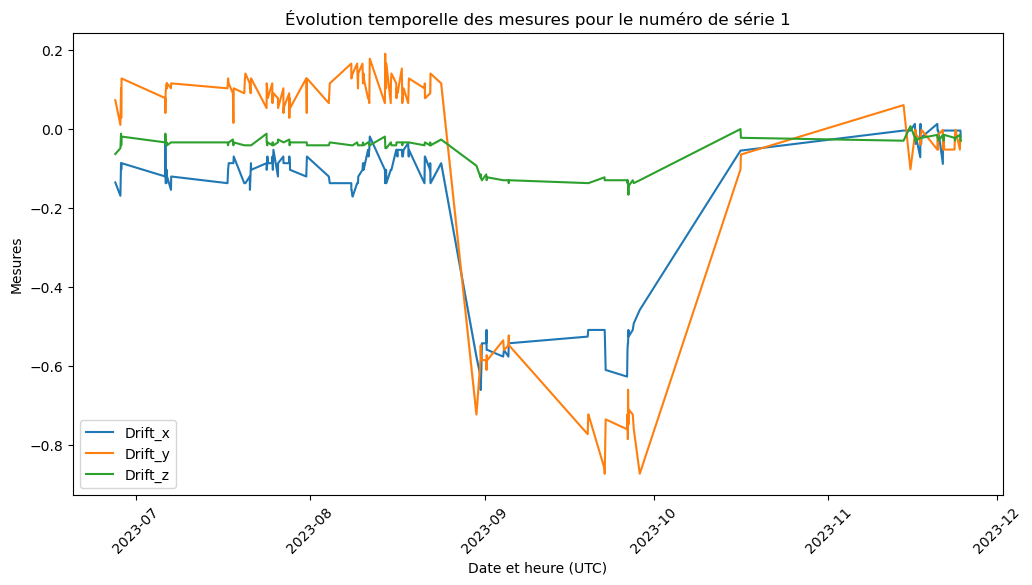

In [57]:

# Sélectionner un numéro de série particulier (remplacer 'NUMERO_SERIE_CHOISI' par le numéro de série souhaité)
numero_serie_choisi = 1
df_serie_choisi = df[df['serial_number'] == numero_serie_choisi]

# Convertir la colonne utc_date en type datetime
df_serie_choisi['utc_date'] = pd.to_datetime(df_serie_choisi['utc_date'])

# Tracer l'évolution temporelle des mesures pour le numéro de série choisi
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_x', label='Drift_x')
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_y', label='Drift_y')
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_z', label='Drift_z')
plt.title(f'Évolution temporelle des mesures pour le numéro de série {numero_serie_choisi}')
plt.xlabel('Date et heure (UTC)')
plt.ylabel('Mesures')
plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\amese\AppData\Local\Temp\ipykernel_125976\1236701292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_serie_choisi['utc_date'] = pd.to_datetime(df_serie_choisi['utc_date'])


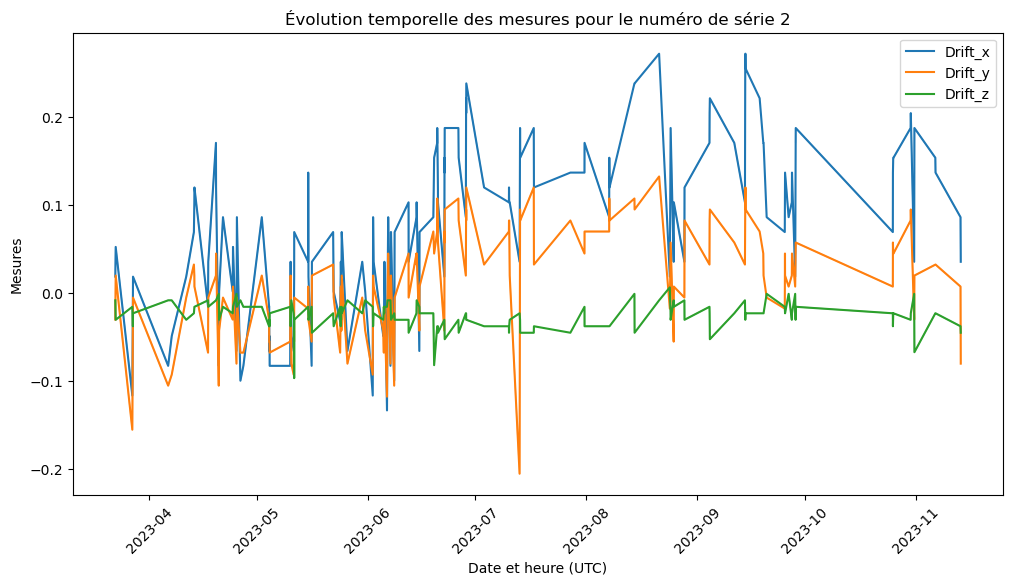

In [56]:
# Sélectionner un numéro de série particulier (remplacer 'NUMERO_SERIE_CHOISI' par le numéro de série souhaité)
numero_serie_choisi = 2
df_serie_choisi = df[df['serial_number'] == numero_serie_choisi]

# Convertir la colonne utc_date en type datetime
df_serie_choisi['utc_date'] = pd.to_datetime(df_serie_choisi['utc_date'])

# Tracer l'évolution temporelle des mesures pour le numéro de série choisi
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_x', label='Drift_x')
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_y', label='Drift_y')
sns.lineplot(data=df_serie_choisi, x='utc_date', y='Drift_z', label='Drift_z')
plt.title(f'Évolution temporelle des mesures pour le numéro de série {numero_serie_choisi}')
plt.xlabel('Date et heure (UTC)')
plt.ylabel('Mesures')
plt.xticks(rotation=45)
plt.legend()
plt.show()


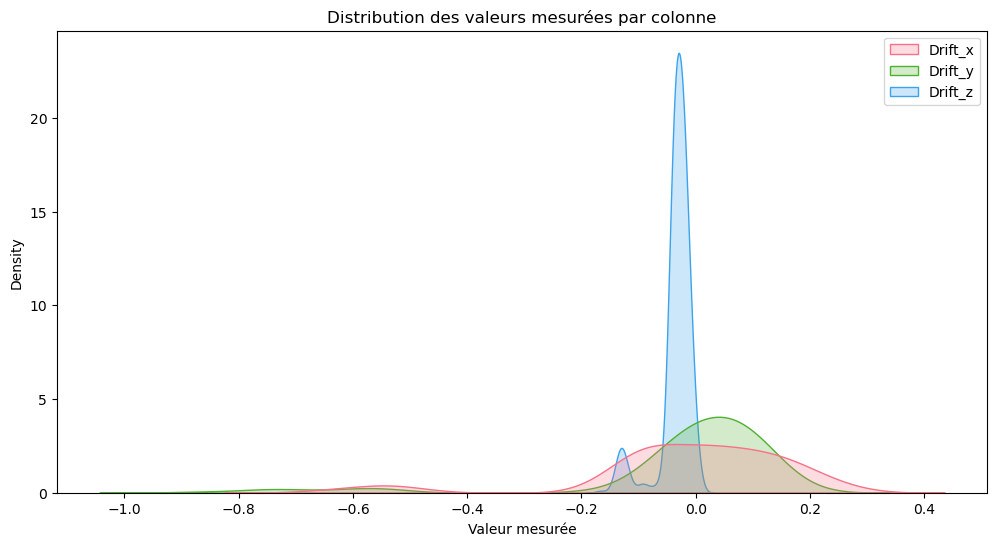

In [58]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[['Drift_x', 'Drift_y', 'Drift_z']], fill=True, common_norm=False, palette='husl')
plt.title('Distribution des valeurs mesurées par colonne')
plt.xlabel('Valeur mesurée')
plt.show()
